# HEART FAILURE PREDICTION

Our objective is to predict the heart failure risk among people based on 
some user characteristics. This is significant in the medical field. If such a 
prediction is sufficiently accurate, we can not only avoid incorrect diagnosis but 
also save human resources.



In [6]:
#importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [7]:
#Loading the dataset
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
#Describing the dataset
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


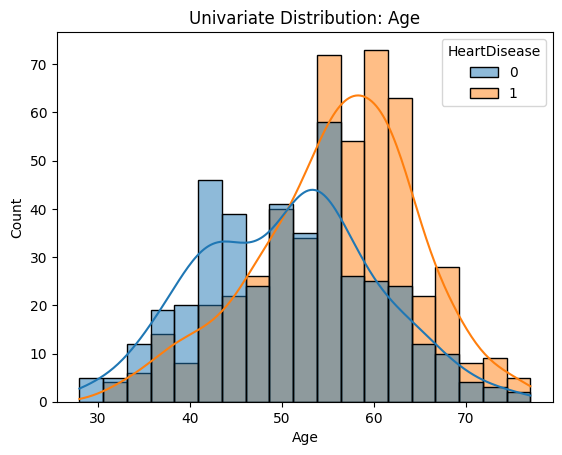

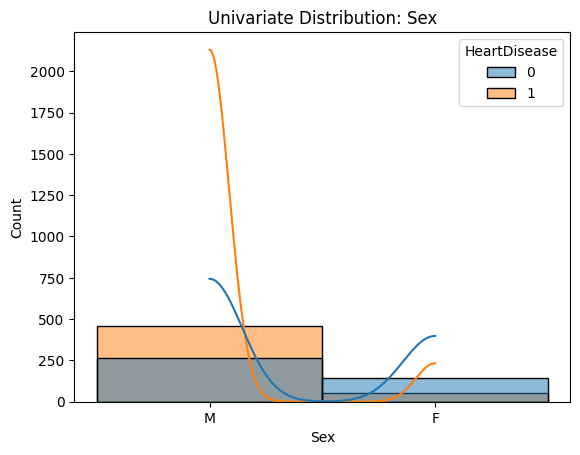

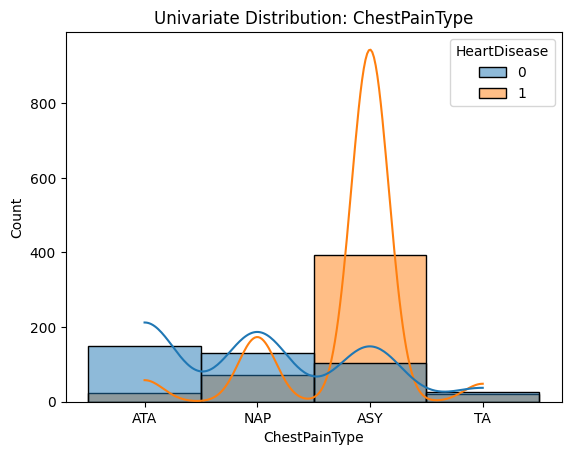

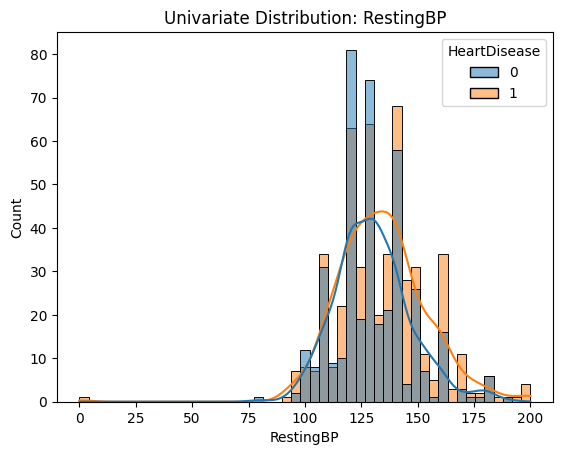

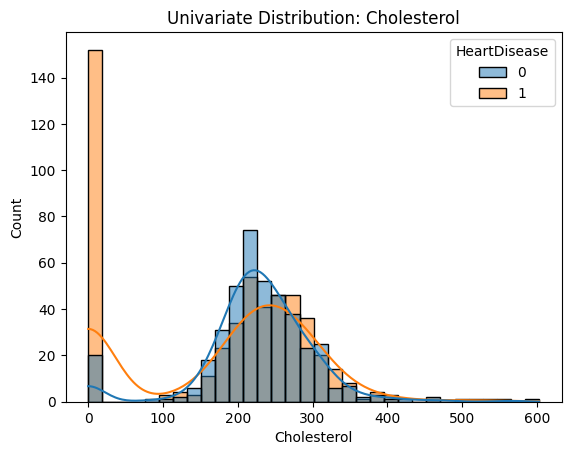

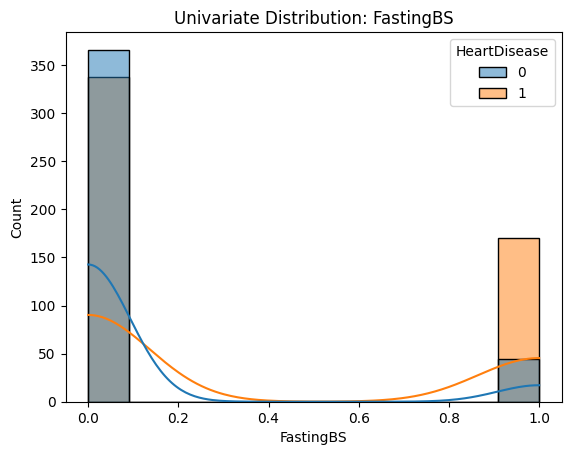

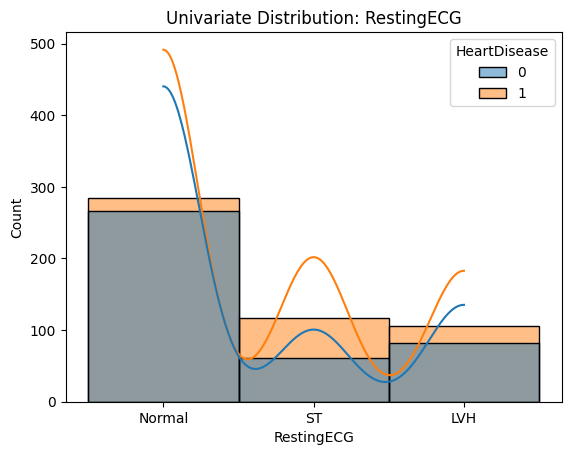

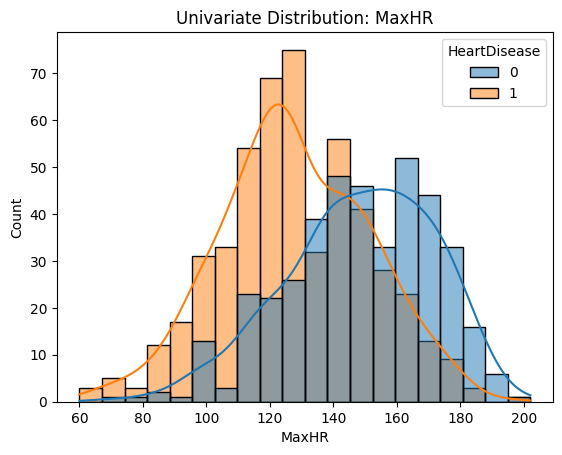

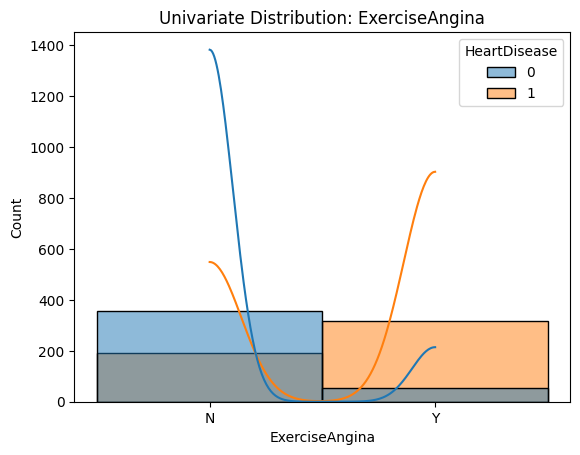

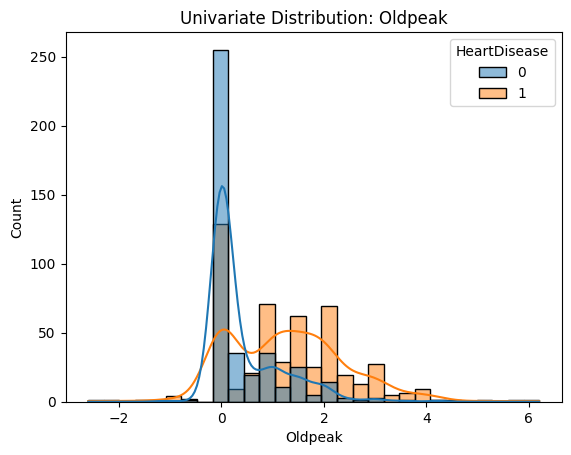

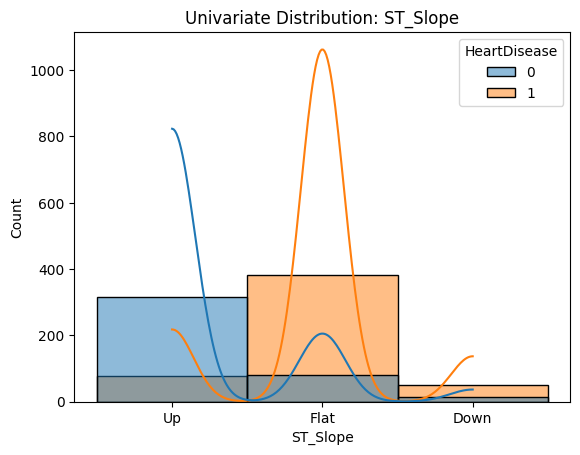

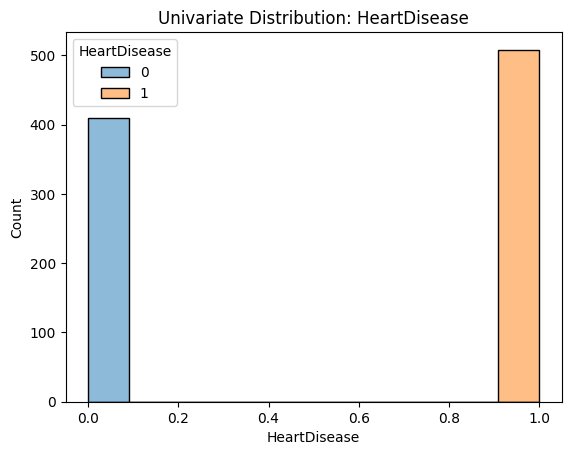

In [9]:
#Univariate Analysis of the Data
for feature in data.columns:
    plt.figure()
    sns.histplot(data=data, x=feature, hue="HeartDisease", kde=True)
    plt.title(f"Univariate Distribution: {feature}")
    plt.show()


The univariate graphs provide insights into the distribution of individual features in the dataset,
including the shape, outliers, data range, mode, and separation of classes.
Analyzing these distributions helps understand the characteristics of each feature 
and their potential relevance in predicting the target variable.

In [10]:
#checking if the dataset contains any NULL values
for col in data.columns:
  check_nan = data[col].isnull().values.any()
  print(check_nan)
data.dropna(inplace=True)

False
False
False
False
False
False
False
False
False
False
False
False


In [11]:
## Performing  data preprocessing
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [12]:
## Performing label encoding for categorical variables
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'MaxHR', 'ST_Slope', 'Cholesterol', 'ExerciseAngina']
for feature in categorical_features:
    label_encoder = LabelEncoder()
    X[feature] = label_encoder.fit_transform(X[feature])

X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,147,0,1,98,0,0.0,2
1,49,0,2,160,40,0,1,82,0,1.0,1
2,37,1,1,130,141,0,2,25,0,0.0,2
3,48,0,0,138,72,0,1,34,1,1.5,1
4,54,1,2,150,53,0,1,48,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,122,0,1,58,0,1.2,1
914,68,1,0,144,51,1,1,67,0,3.4,1
915,57,1,0,130,9,0,1,41,1,1.2,1
916,57,0,1,130,94,0,0,100,0,0.0,1


In [13]:
## Performing feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

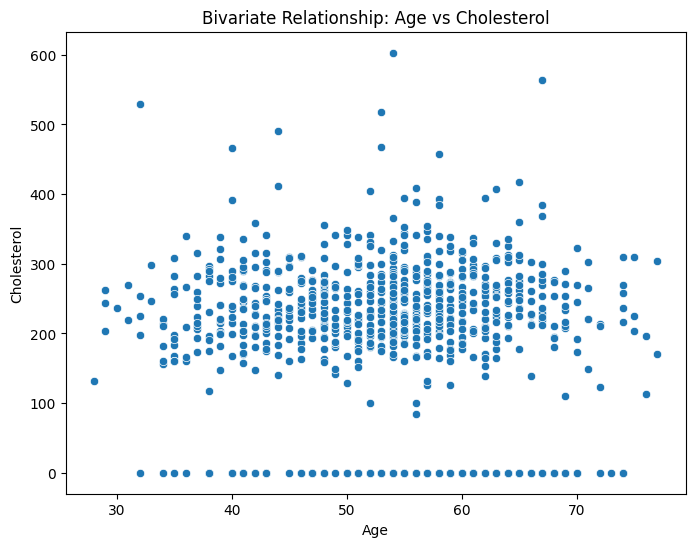

In [14]:
#Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['Cholesterol'])
plt.title("Bivariate Relationship: Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

 The graph helps visualize any potential patterns, trends, or correlations between these two variables. This plot is useful in identifying any possible associations or dependencies between age and cholesterol, which can be valuable for further analysis or predictive modeling.

C:\Users\govin\AppData\Local\Temp\ipykernel_10140\701178683.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


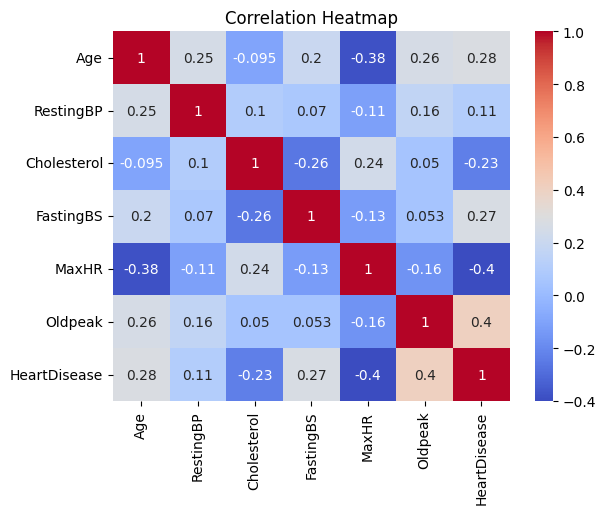

In [15]:
#Multivariate Analysis of the Dataset
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The heatmap uses a coolwarm color map and displays the correlation values as annotations. This plot helps identify the strength and direction of the relationships between the variables, aiding in feature selection and understanding the interdependencies within the dataset.

In [16]:
## Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
## Building the model
Model= RandomForestClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

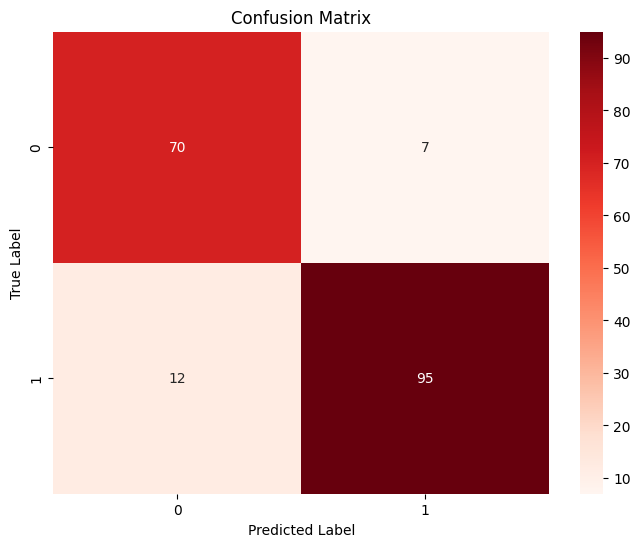

In [19]:
# Evaluating the model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
print("Accuracy:", accuracy)

Accuracy: 0.8967391304347826


In [21]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        77
           1       0.93      0.89      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184

